In [3292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## <center>ПЛАН РЕШЕНИЯ<center>

[$0$. Загрузка данных](#part0)

[$1$. Разведочный анализ EDA](#part1)\
[$1.1$. Приведение типов](#par1.1) \
[$1.2$. Распределение целевой переменной](#par1.2) \
[$1.3$. Анализ количественных признаков](#par1.3) \
[$1.4$. Обработка выбросов в количественных признаках](#par1.4) \
[$1.5$. Анализ категориальных признаков](#par1.5) \
[$1.6$. Построение новых признаков](#par1.6)

[$2$. Корреляционный анализ](#part2) \
[$2.1.$ Матрица корреляции](#par2.1) \
[$2.2.$ Корреляция количественных признаков с целевой переменной](#par2.2) \
[$2.3.$ Корреляция категориальных/бинарных признаков с целевой переменной](#par2.3) 

[$3$. Статистический анализ](#part3) \
[$3.1.$ Гипотеза о равенстве математических ожиданий](#par3.1) \
[$3.2.$ Гипотеза о законе распределения генеральной совокупности](#par3.2) 

[$4$. Регрессионный анализ](#part4) \
[$4.1.$ Модель линейной зависимости целевой переменной от одного признака](#par4.1) \
[$4.2.$ Модель линейной зависимости целевой переменной от двух признаков](#par4.2) 

[$5$. Дисперсионный анализ](#part5)\
[$5.1.$ Однофакторный дисперсионный анализ (1 фактор на двух уровнях)](#par5.1)\
[$5.2.$ Однофакторный дисперсионный анализ (1 фактор на трех уровнях)](#par5.2)

## <center> 0. Загрузка данных <a class="anchor" id="part0"></a><center>

**Описание датасета**

Датасет содержит сведения о покупателях магазина.

**CustomerID** -- ID пользователя

**Genrе** -- Пол

**Age** -- Возраст

**Annual Income** -- Годовой доход (тыс. $)

**Spending Score (1-100)** -- Оценка расходов

In [3293]:
df = pd.read_csv('Mall_Customers.csv', encoding='cp1251')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3294]:
df.shape

(200, 5)

Датасет содержит 200 наблюдений и 5 признаков.

In [3295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Пропусков в признаках нет.

## <center> 1. Разведочный анализ EDA <a class="anchor" id="part1"></a><center>

### 1.1. Приведение типов<a class="anchor" id="par1.1"></a>

Поскольку признак CustomerID, содержащий уникальный ID, не несет статистической информации, рассматривать его не будем.

In [3296]:
# Признак с ID покупателем переводим в категории
df['CustomerID'] = df['CustomerID'].astype('category')

In [3297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    category
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3), object(1)
memory usage: 18.3+ KB


### 1.2. Распределение целевой переменной <a class="anchor" id="par1.2"></a>

Исследуем распределение целевой переменной.

In [3298]:
target = 'Spending Score (1-100)'

Проверяем распределение на нормальность:

In [3299]:
stat, p = stats.shapiro(df[target])
print(f'Проверка признака {target}')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)\n')
else:
    print('Sample does not look Gaussian (reject H0)\n')

Проверка признака Spending Score (1-100)
Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)



Оценим распределение целевой переменной с помощью графических средств и статистик.

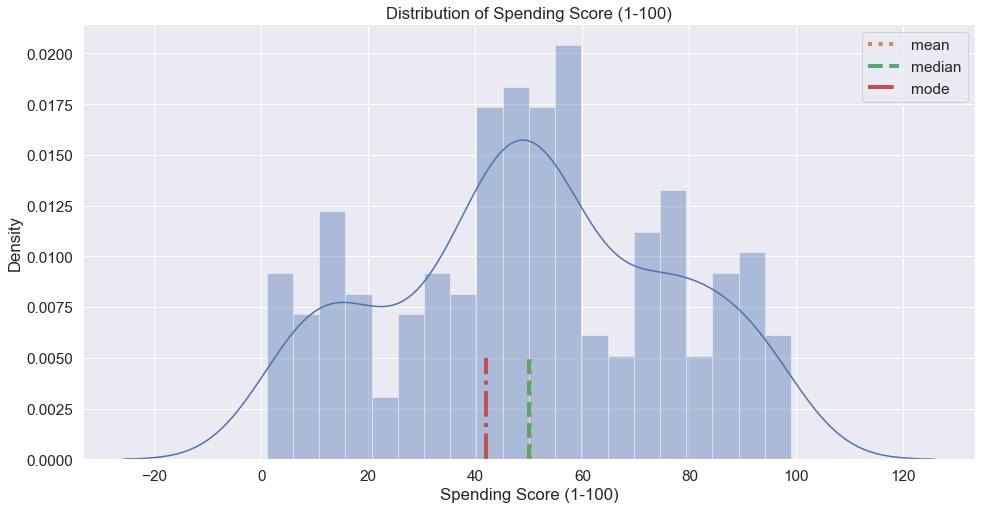

In [3300]:
plt.figure(figsize = (16, 8))

sns.distplot(df[target], bins=20)

y = np.linspace(0, 0.005, 10)
plt.plot([df[target].mean()] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([df[target].median()] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([df[target].mode()[0]] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Spending Score (1-100)')
plt.legend()
plt.show()

Из гистограммы видно, распределение отлично от нормального.\
Однако, значения моды, медианы и среднего достаточно близки.

Построим QQ-кривую.

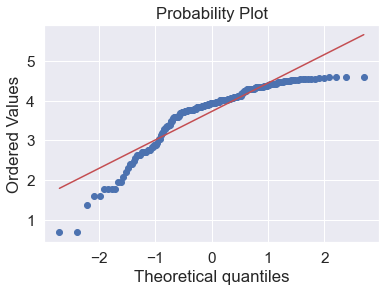

In [3301]:
fig = plt.figure()
res = stats.probplot(np.log1p(df[target]), plot=plt)
plt.show()

Распределение имеет вид, отличный от нормального.

In [3302]:
df[target].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

Все значения целевой переменной принадлежат интервалу $(mean - 3\cdot std; mean + 3\cdot std)$.

**Вывод:** Целевая переменная имеет распределение, отличное от нормального.

### 1.3. Анализ количественных признаков<a class="anchor" id="par1.3"></a>

In [3303]:
# Собираем количественные признаки
num_features = ['Age', 'Annual Income (k$)']

Проверим распределения количественных признаков на "нормальность".

In [3304]:
# Используем критерий Шапиро-Уилка
# H0: случайная величина имеет нормальное распределение
# H1: случайная величина не имеет нормальное распределение

for num_feature in num_features:
    stat, p = stats.shapiro(df[num_feature])
    print(f'Проверка признака {num_feature}')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n')

Проверка признака Age
Statistics=0.952, p=0.000
Sample does not look Gaussian (reject H0)

Проверка признака Annual Income (k$)
Statistics=0.978, p=0.004
Sample does not look Gaussian (reject H0)



Для достоверности произведем визуальную оценку распределений признаков.

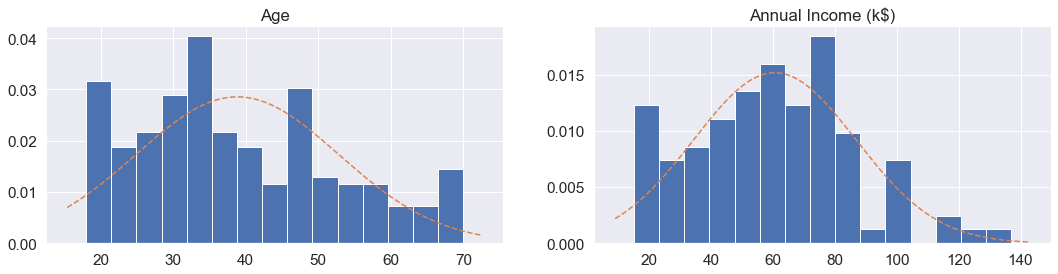

In [3305]:
#Cтроим гистограммы для количественных признаков
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 4)
axes = axes.flatten()

for num_feature, ax in zip(num_features, axes):
    ax.hist(df[num_feature], density=True, bins=15)
    
    loc = df[num_feature].mean()
    scale = df[num_feature].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(num_feature)

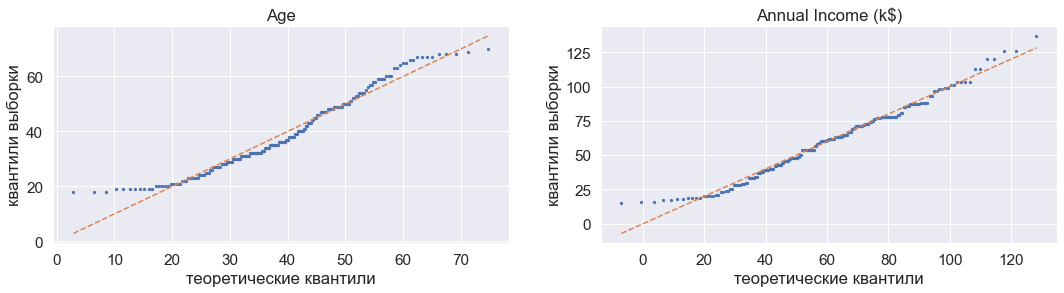

In [3306]:
#Cтроим QQ-кривые для количественных признаков
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 4)
axes = axes.flatten()

for num_feature, ax in zip(num_features, axes):
    samples = df[num_feature]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(num_feature)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального". 

In [3307]:
#проверям равенство моды, медианы и среднего
for num_feature in num_features:
    print(f'{num_feature}: mean: {df[num_feature].mean()}, median: {df[num_feature].median()}, mode: {df[num_feature].mode()[0]} \n')

Age: mean: 38.85, median: 36.0, mode: 32 

Annual Income (k$): mean: 60.56, median: 61.5, mode: 54 



Значения моду, медианы и среднего у всех признаков близки.

In [3308]:
# проверям правило трех сигм
for num_feature in num_features:
    print(f'{num_feature}: ({df[num_feature].mean() - 3*df[num_feature].std(ddof = 1)}, {df[num_feature].mean() + 3*df[num_feature].std(ddof = 1)}) \n')

Age: (-3.0570219946766457, 80.75702199467665) 

Annual Income (k$): (-18.23416349581376, 139.35416349581376) 



In [3309]:
#находим min и maх значений признаков
df[num_features].describe()

,Age,Annual Income (k$)
count,200.000000,200.000000
mean,38.850000,60.560000
std,13.969007,26.264721
min,18.000000,15.000000
25%,28.750000,41.500000
50%,36.000000,61.500000
75%,49.000000,78.000000
max,70.000000,137.000000


Значения всех признаков попадают в соответствующий интервал трех сигм.

mu = 38.85 and sigma = 13.93


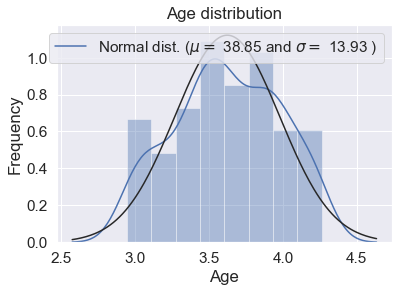

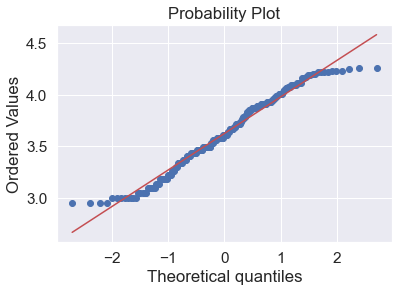

mu = 60.56 and sigma = 26.20


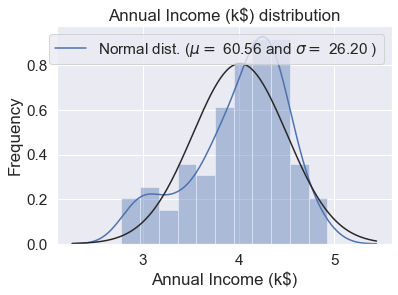

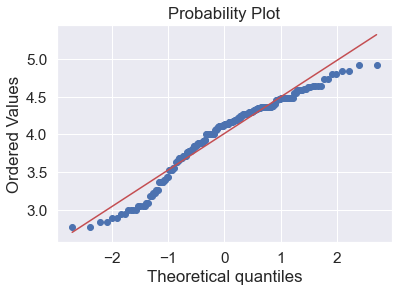

In [3310]:
# Оценим распределения количественных признаков по их выборкам.
for num_feature in num_features:
    feature_log = np.log1p(df[num_feature])
    sns.distplot(feature_log, fit=norm)
    mu, sigma = norm.fit(df[num_feature])

    print(f'mu = {mu:.2f} and sigma = {sigma:.2f}')

    plt.legend(
    [f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f} )'], loc='best')
    plt.ylabel('Frequency')
    plt.title(f'{num_feature} distribution')

    # QQ-plot
    fig = plt.figure()
    res = stats.probplot(feature_log, plot=plt)
    plt.show()

**Вывод:** Распределения количественных признаков отличны от нормального.

### 1.4. Обработка выбросов в количественных признаках <a class="anchor" id="par1.4"></a>

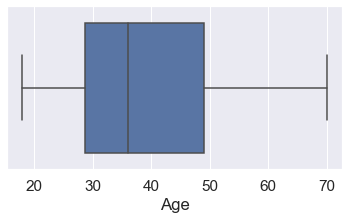

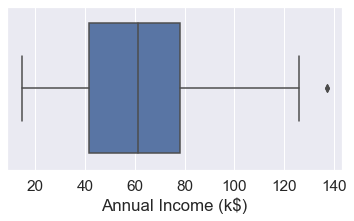

In [3311]:
for num_feature in num_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(df[num_feature], whis=1.5)
    plt.xlabel(num_feature)
    plt.show()

В признакe Age выбросов нет. В признаке Annual Income (k$) есть выброс, определим его значение.

In [3312]:
df['Annual Income (k$)'].value_counts().sort_index()

15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Name: Annual Income (k$), Length: 64, dtype: int64

Заменим выброс в признаке Annual Income (k$) медианой по этому признаку.

In [3313]:
df.loc[df['Annual Income (k$)'] == 137, 'Annual Income (k$)'] = df['Annual Income (k$)'].median()

Проверяем, что в признаке Annual Income (k$) не осталось выбросов.

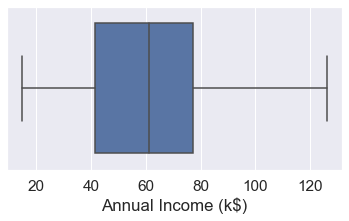

In [3314]:
plt.figure(figsize=(6, 3))
sns.boxplot(df['Annual Income (k$)'], whis=1.5)
plt.xlabel('Annual Income (k$)')
plt.show()

**Вывод:** выбросы в признаках удалены.

### 1.5. Анализ категориальных признаков <a class="anchor" id="par1.5"></a>

In [3315]:
# Собираем категориальные признаки
cat_features = ['Genre']

In [3316]:
# Смотрим значения признаков
for cat_feature in cat_features:
    print(str(cat_feature) + '\n\n' + str(df[cat_feature].value_counts()) + '\n' + '*' * 80 + '\n')

Genre

Female    112
Male       88
Name: Genre, dtype: int64
********************************************************************************



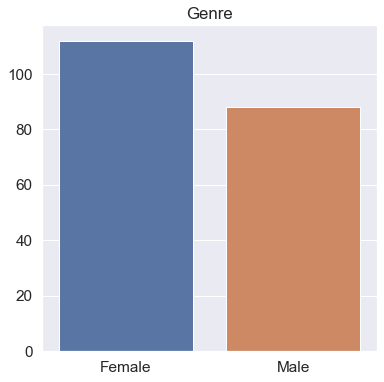

In [3317]:
#смотрим распределение значений категориальных признаков
for cat_feature in cat_features:
    counts = df[cat_feature].value_counts()
    
    plt.figure(figsize=(6,6))    
    plt.title(cat_feature)
    sns.barplot(counts.index, counts.values)
    
    plt.show()

**Вывод:** Число женщин больше числа мужчин.

### 1.6. Построение новых признаков <a class="anchor" id="par1.6"></a>

Преобразуем категориальные признаки в бинарные

In [3318]:
df['Genre'] = df['Genre'].replace({'Female':0, 'Male':1})

## <center> 2. Корреляционный анализ <a class="anchor" id="part2"></a><center>

### 2.1. Матрица корреляции <a class="anchor" id="par2.1"></a>

Составим матрицу корреляции.

In [3319]:
df.corr(method='spearman')

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Genre,1.000000,0.034820,0.039444,-0.040222
Age,0.034820,1.000000,0.029109,-0.344940
Annual Income (k$),0.039444,0.029109,1.000000,0.006860
Spending Score (1-100),-0.040222,-0.344940,0.006860,1.000000


Визуализируем матрицу корреляции.

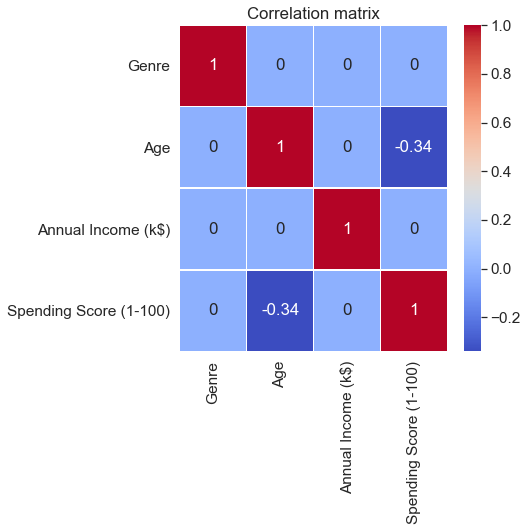

In [3320]:
plt.figure(figsize = (6,6))

sns.set(font_scale=1.4)

corr_matrix = df.corr(method='spearman')
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

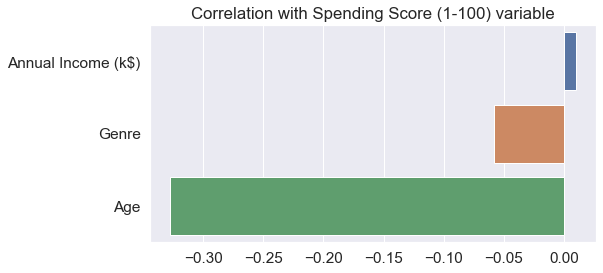

In [3321]:
# Строим матрицу корреляции переменной Spending Score (1-100) с признаками датасета df
corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(8, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with Spending Score (1-100) variable')
plt.show()

**Вывод:** корреляция в признаках и признаков с целевой переменной очень слабая. 

### 2.2. Корреляция количественных признаков с целевой переменной <a class="anchor" id="par2.2"></a>

Проанализируем зависимость Spending Score (1-100) от количественных признаков.

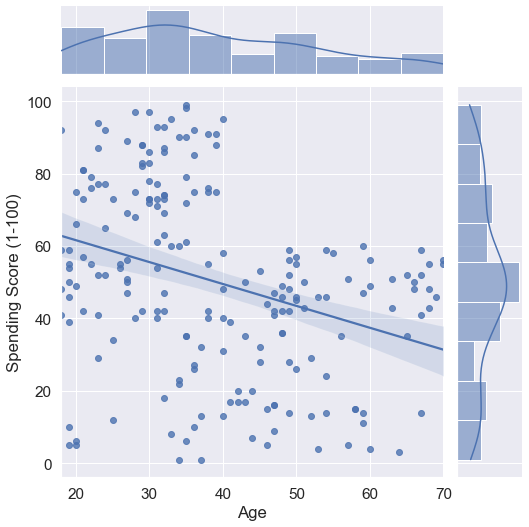

In [3322]:
grid = sns.jointplot(df['Age'], df['Spending Score (1-100)'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Линейная зависимость слабая.

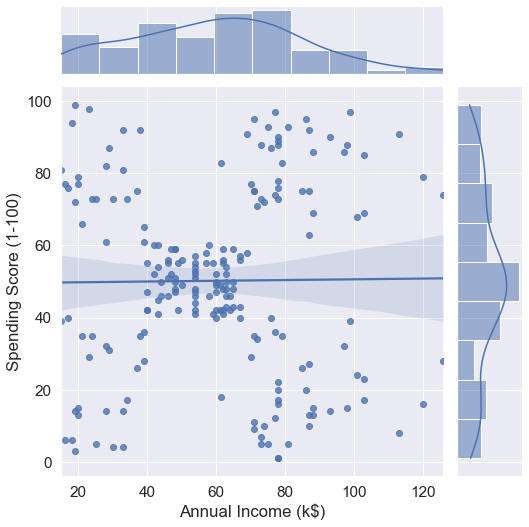

In [3323]:
grid = sns.jointplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Рассмотрим диаграммы рассеивания более детально.

Text(0, 0.5, 'Age')

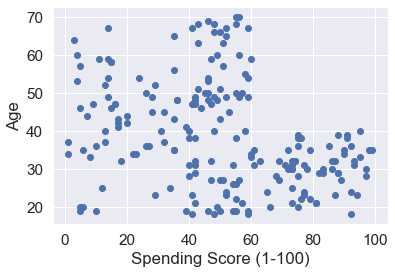

In [3324]:
plt.scatter(df['Spending Score (1-100)'], df['Age'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')

Исходя из диаграммы нельзя сделать однозначного вывода о возможности разбиения на классы.\
Поскольку среди покупателей старше 45 лет нет обладателей высокого Spending Score, то целесообразно исследовать показатели целевой переменной в возрастных группах до и после 45 лет.


Создадим новый признак в зависимости от возраста.

In [3325]:
df['Age less 45'] = (df['Age'] < 45) * 1
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age less 45
0,1,1,19,15.0,39,1
1,2,1,21,15.0,81,1
2,3,0,20,16.0,6,1
3,4,0,23,16.0,77,1
4,5,0,31,17.0,40,1
...,...,...,...,...,...,...
195,196,0,35,120.0,79,1
196,197,0,45,126.0,28,0
197,198,1,32,126.0,74,1
198,199,1,32,61.5,18,1


Text(0, 0.5, 'Annual Income (k$)')

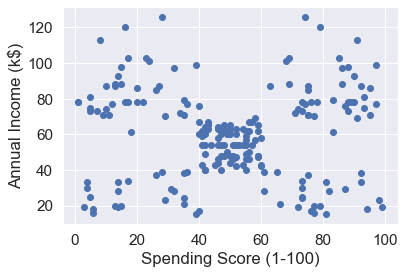

In [3326]:
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

На диаграмме видно, что всех покупателей можно разделить на 5 классов в зависимости от уровня годового дохода и оценки расходов:

1 -- покупатели, у которых Annual Income <50 и Spending Score < 50 \
2 -- покупатели, у которых Annual Income >50 и Spending Score < 50 \
3 -- покупатели, у которых 35 <=Annual Income <=70 и 35<= Spending Score <= 65 \
4 -- покупатели, у которых Annual Income <50 и Spending Score > 60 \
5 -- покупатели, у которых Annual Income >50 и Spending Score > 60 

Создадим новые признаки в зависимости от уровня дохода.

In [3327]:
df['Small Annual Income (k$)'] = (df['Annual Income (k$)'] < 40) * 1
df['Average Annual Income (k$)'] = ((df['Annual Income (k$)'] >= 40)&(df['Annual Income (k$)'] <= 70)) * 1
df['Big Annual Income (k$)'] = (df['Annual Income (k$)'] > 70) * 1
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age less 45,Small Annual Income (k$),Average Annual Income (k$),Big Annual Income (k$)
0,1,1,19,15.0,39,1,1,0,0
1,2,1,21,15.0,81,1,1,0,0
2,3,0,20,16.0,6,1,1,0,0
3,4,0,23,16.0,77,1,1,0,0
4,5,0,31,17.0,40,1,1,0,0
...,...,...,...,...,...,...,...,...,...
195,196,0,35,120.0,79,1,0,0,1
196,197,0,45,126.0,28,0,0,0,1
197,198,1,32,126.0,74,1,0,0,1
198,199,1,32,61.5,18,1,0,1,0


Оценим еще раз матрицу корреляции с новыми признаками.

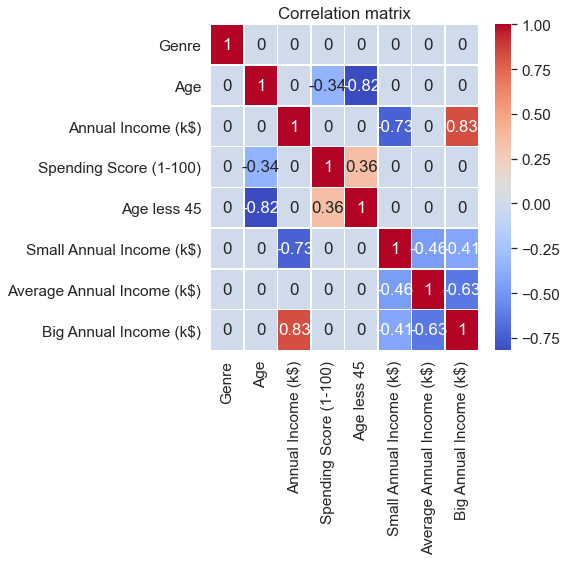

In [3328]:
plt.figure(figsize = (6,6))

sns.set(font_scale=1.4)

corr_matrix = df.corr(method='spearman')
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

**Вывод:** корреляция с количественными признаками слабая. Больше всего целевая переменная коррелирует с признаком Age less 45, меньше всего -- с признаком Age.

### 2.3. Корреляция категориальных/бинарных признаков с целевой переменной <a class="anchor" id="par2.3"></a>

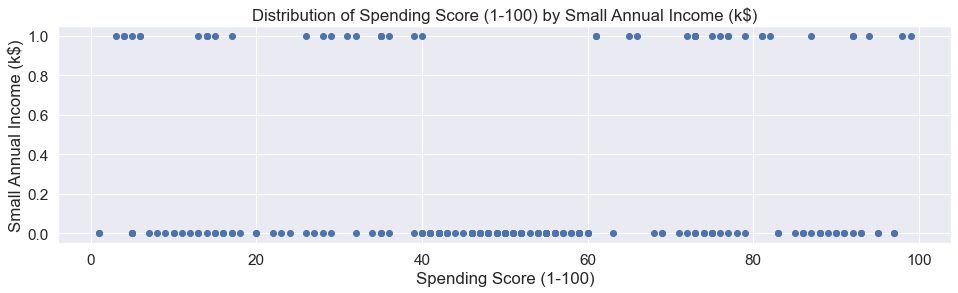

In [3329]:
plt.figure(figsize=(16, 4))

plt.scatter(df['Spending Score (1-100)'], df['Small Annual Income (k$)'])

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Small Annual Income (k$)')
plt.title('Distribution of Spending Score (1-100) by Small Annual Income (k$)')
plt.show()


Покупатели с доходом ниже среднего могут иметь как небольшое, так и большое значение Spending Score. Но не имеют среднего значения оценки расходов (от 40 до 60).

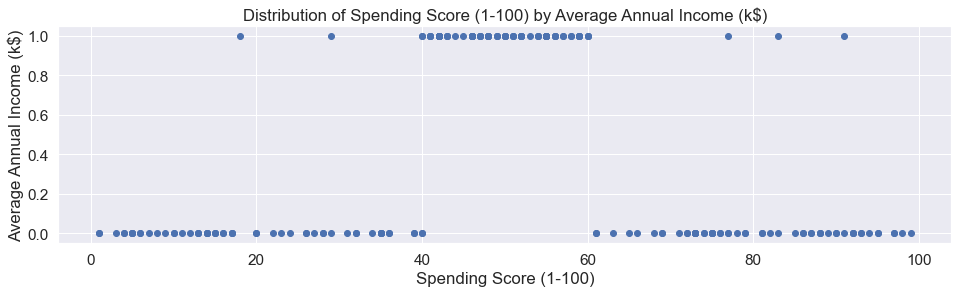

In [3330]:
plt.figure(figsize=(16, 4))

plt.scatter(df['Spending Score (1-100)'], df['Average Annual Income (k$)'])

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Average Annual Income (k$)')
plt.title('Distribution of Spending Score (1-100) by Average Annual Income (k$)')
plt.show()


У покупателей со средним доходом значения Spending Score в большинстве случаев от 40 до 60.

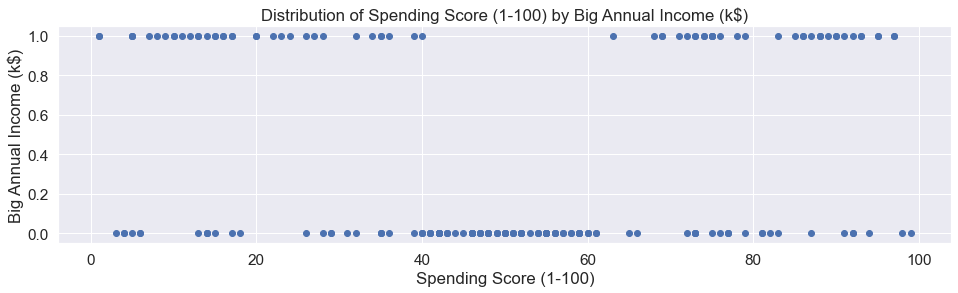

In [3331]:
plt.figure(figsize=(16, 4))

plt.scatter(df['Spending Score (1-100)'], df['Big Annual Income (k$)'])

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Big Annual Income (k$)')
plt.title('Distribution of Spending Score (1-100) by Big Annual Income (k$)')
plt.show()


Покупатели с высоким доходом имеют Spending Score либо выше, либо ниже среднего. Среднее значение оценки расходов (от 40 до 60) у покупателей с доходом выше среднего отсутствует.

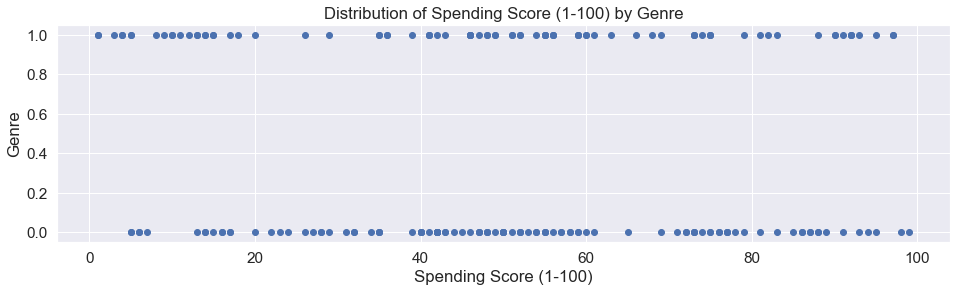

In [3332]:
plt.figure(figsize=(16, 4))

plt.scatter(df['Spending Score (1-100)'], df['Genre'])

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Genre')
plt.title('Distribution of Spending Score (1-100) by Genre')
plt.show()

Значения Spending Score от 40 до 60 больше у женщин.

Среди покупателей с высоким значением Spending Score преобладают женщины.

In [3333]:
df.loc[(df['Average Annual Income (k$)'] == 1) & (df['Genre'] == 0), 'Age'].mean()

41.12765957446808

Средний возраст женщин, имеющих средний доход, 41 год.

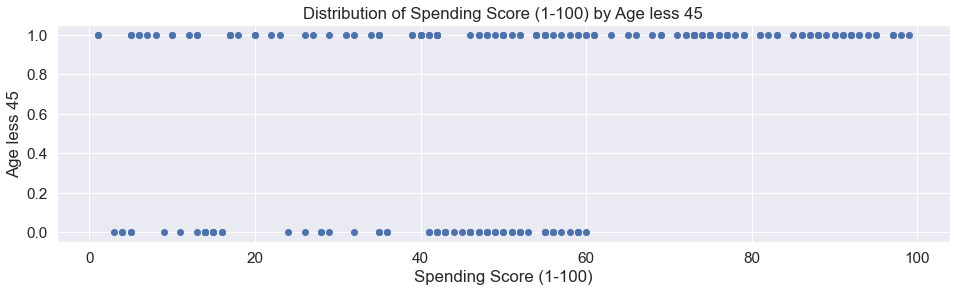

In [3334]:
plt.figure(figsize=(16, 4))

plt.scatter(df['Spending Score (1-100)'], df['Age less 45'])

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age less 45')
plt.title('Distribution of Spending Score (1-100) by Age less 45')
plt.show()

In [3335]:
df.loc[df['Age less 45'] == 0, 'Spending Score (1-100)'].max()

60

Покупатели в возрасте >=45 имеют Spending Score <=60.

**Вывод:** средние значения Spending Score от 40 до 60 больше у покупателей со средним доходом (женщин среди них больше).\
Среди покупателей с высоким значением Spending Score преобладают женщины (средний возраст таких покупательниц 41 год). \
Spending Score покупателей в возрасте более 45 лет не превышает 60.

## <center> 3. Статистический анализ <a class="anchor" id="part3"></a><center>

### 3.1. Гипотеза о равенстве математических ожиданий <a class="anchor" id="par3.1"></a>

Как было показано в [пункте 1.2](#par1.2), количественные признаки не имеют нормального распределения. Поэтому оценивать гипотезы о равенстве математических ожиданий по данным признакам с помощью критерия Cтьюдента нельзя. Но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

Сформируем две выборки:
    
$pr_1$ -- значения Spending Score у покупателей c доходом ниже среднего ( < 40 тыс. $).
    
$pr_2$ -- значения Spending Score у покупателей со средним доходом (от 40 до 70 тыс. $).

In [3336]:
pr1 = df.loc[df['Small Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values
pr2 = df.loc[df['Average Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values

print(pr1)
print(pr2)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65]
[55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47
 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40
 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59
 43 57 56 40 58 91 29 77 18 83]


Вычислим средние данных выборок:

In [3337]:
pr1.mean(), pr2.mean()

(49.73913043478261, 50.47560975609756)

Средние выборочные значения имеют небольшое различие. Проверим статистическую значимость их разницы.

Нулевая гипотеза $H_0$: математическое ожидание выборок pr1 и pr2 совпадают.\
Альтернативная гипотеза $H_1$: математическое ожидание выборок pr1 и pr2 не совпадают. \
Уровень значимости $\alpha:$ 0.05.

In [3338]:
stats.mannwhitneyu(pr1, pr2)

MannwhitneyuResult(statistic=1859.5, pvalue=0.44860776163617305)

Так как $\alpha < p-value$, то на уровне значимости $\alpha$ нулевую гипотезу принимаем, т.е. математические ожидания двух выборок статистически не отличимы.

Проверим аналогичную гипотезу, но уже для выборок

$pr_2$ -- значения Spending Score у покупателей со средним доходом (от 40 до 70 тыс. $),

$pr_3$ -- значения Spending Score у покупателей c доходом выше среднего ( > 70 тыс. $).

In [3339]:
pr2 = df.loc[df['Average Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values
pr3 = df.loc[df['Big Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values

print(pr2)
print(pr3)

[55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47
 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40
 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59
 43 57 56 40 58 91 29 77 18 83]
[35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87 12 97 36 74 22 90
 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95 27 63 13 75 10 92
 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69  8 91 16 79 28 74]


Вычислим средние данных выборок:

In [3340]:
pr2.mean(), pr3.mean()

(50.47560975609756, 50.18055555555556)

Средние выборочные значения имеют небольшое различие. Проверим статистическую значимость их разницы.

Нулевая гипотеза $H_0$: математическое ожидание выборок pr2 и pr3 совпадают.\
Альтернативная гипотеза $H_1$: математическое ожидание выборок pr2 и pr3 не совпадают. \
Уровень значимости $\alpha:$ 0.05.

In [3341]:
stats.mannwhitneyu(pr2, pr3)

MannwhitneyuResult(statistic=2914.0, pvalue=0.44597647802440443)

Так как $\alpha < p-value$, то на уровне значимости $\alpha$ нулевую гипотезу принимаем, т.е. математические ожидания двух выборок статистически не отличимы.

**Вывод:** математические ожидания Spending Score у покупателей с доходом ниже, средний и выше среднего совпадают. Следовательно, годовой доход покупателя не влияет на Spending Score.

Проверим аналогичную гипотезу, но уже для выборок

$pr_4$ -- значения Spending Score у мужчин,

$pr_5$ -- значения Spending Score у женщин.

In [3342]:
pr4 = df.loc[df['Genre'] == 1, 'Spending Score (1-100)'].values
pr5 = df.loc[df['Genre'] == 0, 'Spending Score (1-100)'].values

print(pr4)
print(pr5)

[39 81  3 14 13 79 66 29 35 73 73 82 61  4  4 92 92 36 60 60 41 46 46 56
 55 51 59 59 55 47 54 48 51 55 41 46 41 49 52 42 49 59 55 56 46 43 48 52
 46 56 91 35 95 11 75  9 75  5 73 10 93 12 97 36 90 17 88  1  1  5 26 20
 63 13 75 10 92 15 69 14 90 15 97 68  8 74 18 83]
[ 6 77 40 76  6 94 72 99 15 77 35 98  5 14 32 31 87 73 14 81 17 73 26 75
 35 61 28 65 55 47 42 42 52 54 45 50 51 52 59 50 48 47 42 49 56 53 52 42
 44 57 58 55 60 46 55 40 42 47 50 41 48 42 50 54 42 48 50 43 59 43 57 40
 58 29 77 34 71 88  7 72  5 40 87 74 22 20 76 16 89 78 73 35 83 93 75 95
 27 13 86 32 86 88 39 24 17 85 23 69 91 16 79 28]


Вычислим средние данных выборок:

In [3343]:
pr4.mean(), pr5.mean()

(48.51136363636363, 51.526785714285715)

Средние выборочные значения имеют небольшое различие. Проверим статистическую значимость их разницы.

Нулевая гипотеза $H_0$: математическое ожидание выборок pr4 и pr5 совпадают.\
Альтернативная гипотеза $H_1$: математическое ожидание выборок pr4 и pr5 не совпадают. \
Уровень значимости $\alpha:$ 0.05.

In [3344]:
stats.mannwhitneyu(pr4, pr5)

MannwhitneyuResult(statistic=4697.5, pvalue=0.2856397094080328)

Так как $\alpha < p-value$, то на уровне значимости $\alpha$ нулевую гипотезу принимаем, т.е. математические ожидания двух выборок статистически не отличимы.

**Вывод:** математические ожидания Spending Score у мужчин и женщин совпадают. Следовательно, пол покупателя не влияет на Spending Score.

Проверим аналогичную гипотезу, но уже для выборок

$pr_6$ -- значения Spending Score у покупателей в возрасте < 45,

$pr_7$ -- значения Spending Score у покупателей в возрасте >= 45.

In [3345]:
pr6 = df.loc[df['Age less 45'] == 1, 'Spending Score (1-100)'].values
pr7 = df.loc[df['Age less 45'] == 0, 'Spending Score (1-100)'].values

print(pr6)
print(pr7)

[39 81  6 77 40 76  6 94 72 99 77 13 79 35 66 98 35 73 73 82 61 31 87 73
 92 81 17 73 26 75 92 61 65 47 42 42 60 54 51 55 59 50 59 47 54 48 52 55
 57 55 60 41 40 42 52 50 49 41 55 42 54 42 46 48 50 56 40 58 91 29 77 35
 95 75 75 34 71  5 88  7 73 10 72 93 40 87 12 97 74 22 90 17 88 20 76 89
  1 78  1 73 83  5 93 75 20 95 27 63 13 75 10 92 86 69 90 32 86 88 39 97
 68 17 85 23 69  8 91 79 74 18 83]
[ 3 14 15 29  5 14 32  4  4 14 35 36 28 55 52 60 45 41 50 46 46 56 52 59
 51 48 55 42 49 56 47 53 42 51 41 44 46 58 46 55 49 47 42 48 59 56 50 46
 43 48 52 43 59 43 57 11  9  5 36 16 35 26 13 15 14 15 24 16 28]


Вычислим средние данных выборок:

In [3346]:
pr6.mean(), pr7.mean()

(56.916030534351144, 37.44927536231884)

Средние выборочные значения имеют ощутимое различие. Проверим его статистическую значимость.

Нулевая гипотеза $H_0$: математическое ожидание выборок pr6 и pr7 совпадают.\
Альтернативная гипотеза $H_1$: математическое ожидание выборок pr6 и pr7 не совпадают. \
Уровень значимости $\alpha:$ 0.05.

In [3347]:
stats.mannwhitneyu(pr6, pr7)

MannwhitneyuResult(statistic=2554.0, pvalue=2.1984513681533553e-07)

Так как $\alpha > p-value$, то на уровне значимости $\alpha$ нулевую гипотезу отвергаем, т.е. математические ожидания двух выборок статистически отличимы.

**Вывод:** математические ожидания Spending Score у разных возрастных групп не совпадают. Следовательно, возраст покупателя влияет на Spending Score.

### 3.2. Гипотеза о законе распределения генеральной совокупности <a class="anchor" id="par3.2"></a>

В [пункте 1.3](#par1.3) было показано, что количественные признаки имеют распределение отличное от нормального. Однако, у признака Annual Income визуально отличие от нормального распределения было не таким сильным как у остальных. К тому же все статистические показатели соответствовали нормальному распределению. Поэтому проверим гипотезу о нормальности распределения признака Annual Incomе еще раз "в ручную".

На уровне значимости $\alpha = 0,05$ проверим гипотезу о том, что генеральная совокупность признака Annual Income (k$) распределена нормально. 

Нулевая гипотеза $H_0$: генеральная совокупность имеет нормальное распределение.

Альтернативная гипотеза: $H_1$: генеральная совокупность НЕ имеет нормальное распределение.

Критерий Пирсона: $\chi^2 = \Sigma\frac{(n_i - {n_i}')^2}{{n_i}'}$ имеет распределение $\chi^2$.

По имеющейся выборе имеем следующий частотный ряд (эмпитирческие частоты) признака Annual Income (k$)

In [3348]:
df['Annual Income (k$)'].value_counts()

54.0     12
78.0     12
60.0      6
87.0      6
62.0      6
         ..
61.0      2
126.0     2
59.0      2
58.0      2
15.0      2
Name: Annual Income (k$), Length: 64, dtype: int64

Составим интервальный ряд:

In [3349]:
# Определяем число интервалов для построения интервального ряда
ck = 1 + 3.322*np.log(200)
k = round(ck,0)-1
print(f'Число интервалов: {k}')

#определим длину частичного интервала
ch = (df['Annual Income (k$)'].max() - df['Annual Income (k$)'].min())/k
h = round(сh,0)
print(f'Длина частичного интервала: {h}')

Число интервалов: 18.0
Длина частичного интервала: 6.0


<AxesSubplot:>

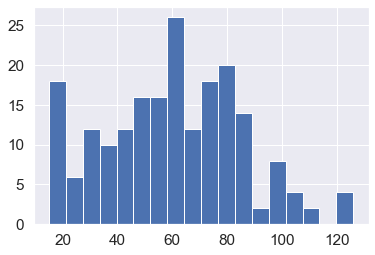

In [3350]:
df['Annual Income (k$)'].hist(bins=18)

In [3351]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      59.805000
std       25.110699
min       15.000000
25%       41.500000
50%       61.250000
75%       77.250000
max      126.000000
Name: Annual Income (k$), dtype: float64

In [3352]:
h = 6
i_0 = (df['Annual Income (k$)'].min(), df['Annual Income (k$)'].min() + h)
x_0 = df.loc[df['Annual Income (k$)'] < i_0[1], 'Annual Income (k$)'].count()
i = [i_0] #составляем интервалы
x = [x_0] #находим частоты

n = i[0][1]
while n < df['Annual Income (k$)'].max():
    i.append((n, n + h))
    x.append(df.loc[(df['Annual Income (k$)'] >= n)&(df['Annual Income (k$)'] < n + h), 'Annual Income (k$)'].count())    
    n = n + h

#середины интервалов
s = []
for el in i:
    s.append((el[1] + el[0]) / 2)


In [3353]:
df_w = pd.DataFrame({'Интервалы': i, 'x_i': s, 'n_i': x})
df_w['x_i * n_i'] = df_w['x_i'] * df_w['n_i']
df_w['(x_i)^2 * n_i'] = df_w['x_i'] * df_w['x_i'] * df_w['n_i']
df_w

,Интервалы,x_i,n_i,x_i * n_i,(x_i)^2 * n_i
0,"(15.0, 21.0)",18.0,16,288.0,5184.0
1,"(21.0, 27.0)",24.0,8,192.0,4608.0
2,"(27.0, 33.0)",30.0,8,240.0,7200.0
3,"(33.0, 39.0)",36.0,10,360.0,12960.0
4,"(39.0, 45.0)",42.0,16,672.0,28224.0
5,"(45.0, 51.0)",48.0,16,768.0,36864.0
6,"(51.0, 57.0)",54.0,12,648.0,34992.0
7,"(57.0, 63.0)",60.0,22,1320.0,79200.0
8,"(63.0, 69.0)",66.0,16,1056.0,69696.0
9,"(69.0, 75.0)",72.0,18,1296.0,93312.0


In [3354]:
xB = df_w['x_i * n_i'].sum() / df_w['n_i'].sum()
dB = df_w['(x_i)^2 * n_i'].sum()/ df_w['n_i'].sum()
sB = np.sqrt(dB)
print(f'Выборочное среднее: {xB}')
print(f'Выборочная дисперсия: {dB}')
print(f'Выборочная стандартное отклонение: {sB}')

Выборочное среднее: 60.36
Выборочная дисперсия: 4272.48
Выборочная стандартное отклонение: 65.36421039070234


Рассчитаем теоретические частоты 

${n_i}' = \frac{h\cdot n}{\sigma_B}\cdot f(z_i)$, где $f(z_i) = \frac{1}{\sqrt(2\pi)}e^{-\frac{x^2}{2}}$ -- функция Гаусса, $z_i = \frac{x_i -\overline{x_B}}{\sigma_B}$

In [3355]:
h = 6
n = 200
df_w['z_i'] = (df_w['x_i'] - xB) / sB 
df_w['f(z_i)'] = (1/np.sqrt(2*np.pi))*np.exp(-(df_w['z_i'] / 2))
df_w["(n_i)'"] = (h*n/sB)*df_w['f(z_i)']
df_w

,Интервалы,x_i,n_i,x_i * n_i,(x_i)^2 * n_i,z_i,f(z_i),(n_i)'
0,"(15.0, 21.0)",18.0,16,288.0,5184.0,-0.648061,0.551613,10.126887
1,"(21.0, 27.0)",24.0,8,192.0,4608.0,-0.556268,0.526868,9.672601
2,"(27.0, 33.0)",30.0,8,240.0,7200.0,-0.464474,0.503233,9.238695
3,"(33.0, 39.0)",36.0,10,360.0,12960.0,-0.372681,0.480659,8.824253
4,"(39.0, 45.0)",42.0,16,672.0,28224.0,-0.280888,0.459097,8.428403
5,"(45.0, 51.0)",48.0,16,768.0,36864.0,-0.189094,0.438502,8.050310
6,"(51.0, 57.0)",54.0,12,648.0,34992.0,-0.097301,0.418831,7.689178
7,"(57.0, 63.0)",60.0,22,1320.0,79200.0,-0.005508,0.400042,7.344247
8,"(63.0, 69.0)",66.0,16,1056.0,69696.0,0.086286,0.382097,7.014788
9,"(69.0, 75.0)",72.0,18,1296.0,93312.0,0.178079,0.364956,6.700110


In [3356]:
# определяем строки с низкими частотами (<5) и заменяем их суммой строк с низкими частотами
df_n.loc[df_n['n_i'] < 5, ['n_i', "(n_i)'"]] = [df_n.loc[df_n['n_i'] < 5, 'n_i'].sum(), df_n.loc[df_n['n_i'] < 5, "(n_i)'"].sum()]
nabl = df_n.drop_duplicates(keep='first')
nabl

,n_i,(n_i)'
0,16,10.126887
1,8,9.672601
2,8,9.238695
3,10,8.824253
4,16,8.428403
5,16,8.050310
6,12,7.689178
7,22,7.344247
8,16,7.014788
9,18,6.700110


Таким образом, имеем 16 интервалов.

$k = 16 - 2 - 1 = 13$ -- количество степеней свободы.

Критическое значение критерия согласия Пирсона: 

$\chi^2(\alpha, k) = \chi^2(0.05, 13) = 22.4$ (по таблице критических точек распределения $\chi^2$).

Критическа область: $(22.4; +\infty)$.

Вычисляем наблюдаемое значение ${\chi^2}_{nabl} = \Sigma\frac{(n_i - {n_i}')^2}{{n_i}'}$:


In [3357]:
chi = (((nabl['n_i'] - nabl["(n_i)'"])**2)/nabl['n_i']).sum()
print(f'Наблюдаемое значение: {chi}')

Наблюдаемое значение: 75.7949836308081


**Вывод**: Так как наблюдаемое значение 75.8 > критического 22.4, то на уровне значимости 0,05 гипотезу  о нормальном распределении генеральной совокупности отвергаем.

## <center> 4. Регрессионный анализ <a class="anchor" id="part4"></a><center>

### 4.1. Модель линейной зависимости целевой переменной от одного признака <a class="anchor" id="par4.1"></a>

Построим модель линейной регрессии. В качестве признака возьмем Аge и Age less 45. Целевая переменная Spending Score (1-100) имеет с признаком Age самую низкую корреляцию, самую высокую -- с признаком Age less 45.

Рассмотрим сначала признак Аge.

In [3358]:
x1 = df['Age'].values
y1 = df['Spending Score (1-100)'].values

b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(73.70119104335406, -0.6049212623771958)

Модель линейной регрессии имеет вид:
$$y = 73.7 -0.6x$$

Построим диаграмму рассеивания и график линейной регрессии.

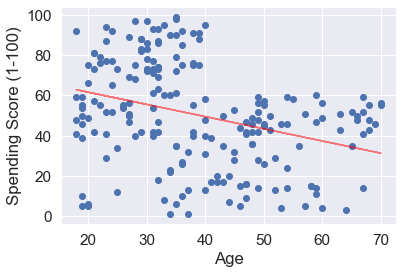

In [3359]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

Найдем коэффициент детерминации.

In [3360]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [3361]:
z1 = b0 + b1 * x1

R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.10707740876869043

Коэффициент детерминации R2 равен 0.107, следовательно модель объясняет 10% дисперсии признака Spending Score.

Оценим построенное уравнение регрессии с помощью F-критерия Фишера.

Нулевая гипотеза $H_0$: теоретический коэффициент детерминации равен  0 , т.е. что в имеющихся данных вообще нет никакой зависимости.

Альтернативная гипотеза $H_1$: теоретический коэффициент детерминации не равен 0.

Критерий: $F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$

где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. 

Имеет распределение Фишера с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Pассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [3362]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 198)

In [3363]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8888529328918806

критическая область: $\Omega_\alpha = \left(3.89, \infty \right)$.

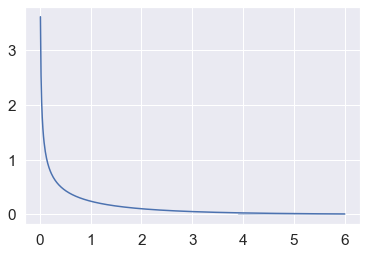

In [3364]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Вычислим наблюдаемое значение F:

In [3365]:
F = (R1 / k1) / ((1 - R1) / k2)
F

23.743745700245757

Поскольку наблюдаемое значение 23.74 попадает в критическую область, то на уровне значимости $\alpha$ гипотезу $H_0$ отвергаем. Следовательно, уравнение линейной регресии значимо. 

**Вывод:** Модель линейной регресии имеет значимое уравнение и объясняет 10% дисперсии признака Spending Score.

Теперь в качестве признака рассмотрим Age less 45.

In [3366]:
x1 = df['Age less 45'].values
y1 = df['Spending Score (1-100)'].values

b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(37.449275362318836, 19.46675517203231)

In [3367]:
z1 = b0 + b1 * x1

R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.12906054979770043

Коэффициент детерминации R2 равен 0.129, следовательно модель объясняет почти 13% дисперсии признака Spending Score.

In [3368]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 198)

In [3369]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8888529328918806

In [3370]:
F = (R1 / k1) / ((1 - R1) / k2)
F

29.340718064854073

Поскольку наблюдаемое значение 29.34 попадает в критическую область, то на уровне значимости $\alpha$ гипотезу $H_0$ отвергаем. Следовательно, уравнение линейной регресии значимо. 

**Вывод:** Модель линейной регресии имеет значимое уравнение и объясняет 13% дисперсии признака Spending Score.

### 4.2. Модель линейной зависимости целевой переменной от двух признаков <a class="anchor" id="par4.2"></a>

Определим уровень линейной зависимости признака Spending Score (1-100) от пары признаков.

Сначала выясним на каких двух признаках модель дает лучшую оценку по $R^2$.

In [3371]:
pr_list1 = ['Genre', 'Age', 'Annual Income (k$)', 'Average Annual Income (k$)', 'Small Annual Income (k$)', 'Big Annual Income (k$)', 'Age less 45']
for pr1 in pr_list1:
    pr_list2 = ['Genre', 'Age', 'Annual Income (k$)', 'Average Annual Income (k$)', 'Small Annual Income (k$)', 'Big Annual Income (k$)', 'Age less 45']
    pr_list2.remove(pr1) # список без pr1
    for pr2 in pr_list2:
        X_pr = df[[pr1, pr2]]
        X_pr['1'] = np.ones((X_pr.shape[0], 1))
        X_pr[['1', pr1, pr2]]
        X = X_pr[['1', pr1, pr2]].values
        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        b = XTX_inv.dot(X.T).dot(df['Spending Score (1-100)'])
        z = X.dot(b)
        R2 = 1 - ((df['Spending Score (1-100)'] - z)**2).sum() / sum_of_squares(df['Spending Score (1-100)'])
        print(f'признаки: {pr1}, {pr2}; R2 = {R2}')

признаки: Genre, Age; R2 = 0.10854140775241583
признаки: Genre, Annual Income (k$); R2 = 0.0035080268592520003
признаки: Genre, Average Annual Income (k$); R2 = 0.0034349332584586723
признаки: Genre, Small Annual Income (k$); R2 = 0.003543358944759878
признаки: Genre, Big Annual Income (k$); R2 = 0.00338881110131084
признаки: Genre, Age less 45; R2 = 0.1311446669092765
признаки: Age, Genre; R2 = 0.10854140775241572
признаки: Age, Annual Income (k$); R2 = 0.10720555776248064
признаки: Age, Average Annual Income (k$); R2 = 0.11398925416651473
признаки: Age, Small Annual Income (k$); R2 = 0.11009842975703932
признаки: Age, Big Annual Income (k$); R2 = 0.10834144321571271
признаки: Age, Age less 45; R2 = 0.1308075097239535
признаки: Annual Income (k$), Genre; R2 = 0.0035080268592520003
признаки: Annual Income (k$), Age; R2 = 0.10720555776248064
признаки: Annual Income (k$), Average Annual Income (k$); R2 = 0.00020937350010352684
признаки: Annual Income (k$), Small Annual Income (k$); R2 = 

Лучшую оценку по $R^2$ (0.114) дает модель линейной регрессии с признаками Age less 45, Average Annual Income.
Построим модель линейной регрессии, используя эти признаки.

In [3372]:
x2 = df[['Age less 45', 'Average Annual Income (k$)']].values

y2 = df['Spending Score (1-100)'].values

ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

model = sm.OLS(y2, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     16.48
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           2.41e-07
Time:                        14:33:59   Log-Likelihood:                -918.07
No. Observations:                 200   AIC:                             1842.
Df Residuals:                     197   BIC:                             1852.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4645      3.633      9.211      0.0

Таким образом, модель линейной регрессии имеет вид: $y = 33.5 + 21.4x_1 + 6.5x_2$.

Проверим значимость полученного уравнения регрессии на уровне значимости 0.05.

In [3373]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 197)

In [3374]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.041753029984693

Вычислим наблюдаемое значение:

In [3375]:
R2 = 0.143 # из OLS Regression Results 
F = (R2 / k1) / ((1 - R2) / k2)
F

16.435822637106185

Так как наблюдаемое значение $16.4$ попало в критическую область $(3; +\infty)$, то на уровне значимости 0.05 нулевая гипотеза отвергается. Следовательно, уравнение регрессии признается значимым.

**Вывод:** Модель линейной регресии имеет значимое уравнение и объясняет 14% дисперсии признака Spending Score.

**P.S.** Линейная взаимосвязь между признаками очень слабая. Скорее всего, зависимость между признаками имеет нелинейный характер.

## <center> 5. Дисперсионный анализ <a class="anchor" id="part5"></a><center>

### 5.1. Однофакторный дисперсионный анализ (1 фактор на 2 уровнях)  <a class="anchor" id="par5.1"></a>

**Проведем дисперсионный анализ для определения наличия различий в оценке расходов (Spending Score) среди мужчин и женщин (признак Genre с 2 наблюдениями).**

Собираем значения Spending Score у мужчин и женщин в выборки $y_1$ и $y_2$ соответственно.

In [3376]:
y1 = df.loc[df['Genre'] == 1, 'Spending Score (1-100)'].values
y2 = df.loc[df['Genre'] == 0, 'Spending Score (1-100)'].values

n1 = y1.shape[0]
n2 = y2.shape[0]

print(y1)
print(y2)
n1, n2

[39 81  3 14 13 79 66 29 35 73 73 82 61  4  4 92 92 36 60 60 41 46 46 56
 55 51 59 59 55 47 54 48 51 55 41 46 41 49 52 42 49 59 55 56 46 43 48 52
 46 56 91 35 95 11 75  9 75  5 73 10 93 12 97 36 90 17 88  1  1  5 26 20
 63 13 75 10 92 15 69 14 90 15 97 68  8 74 18 83]
[ 6 77 40 76  6 94 72 99 15 77 35 98  5 14 32 31 87 73 14 81 17 73 26 75
 35 61 28 65 55 47 42 42 52 54 45 50 51 52 59 50 48 47 42 49 56 53 52 42
 44 57 58 55 60 46 55 40 42 47 50 41 48 42 50 54 42 48 50 43 59 43 57 40
 58 29 77 34 71 88  7 72  5 40 87 74 22 20 76 16 89 78 73 35 83 93 75 95
 27 13 86 32 86 88 39 24 17 85 23 69 91 16 79 28]


(88, 112)

Вычисляем среднее по каждой выборке.

In [3377]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(48.51136363636363, 51.526785714285715)

Средние по выборкам имеют сравненительно небольшую разницу. Проверим статистическую значимость различия средних выборочных.

Нулевая гипотеза $H_0$: средние значения по каждой выборке $y_1$ и $y_2$ равны. \
Альтернативная гипотеза $H_1$: средние значения по выборкам не равны. \
Критерий: $F = \dfrac{\sigma_b^2}{\sigma_{w}^2}$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, где\
$$S_b^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i, \:
S_{w}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2$$,

$$\sigma_b^2 = \dfrac{S_b^2}{k - 1}, \: \sigma_{w}^2 = \dfrac{S_{w}^2}{n - k}.$$


Уровень значимости: $\alpha = 0.05$.\
Критическая область: правосторонняя $(F_{crit}; +\infty)$, где $F_{crit}$ -- квантиль порядка $1 - \alpha$ для распределения $F(k_1, k_2)$.

Вычислим критическое значение $F_{crit}$:

In [3378]:
alpha = 0.05

k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.8888529328918806

Критическая область: $(3.88; +\infty)$.

Теперь рассчитаем наблюдаемое значение $F_{observ}$.

Составляем один массив из всех выборок.

In [3379]:
y = np.concatenate([y1, y2])

print(y)

[39 81  3 14 13 79 66 29 35 73 73 82 61  4  4 92 92 36 60 60 41 46 46 56
 55 51 59 59 55 47 54 48 51 55 41 46 41 49 52 42 49 59 55 56 46 43 48 52
 46 56 91 35 95 11 75  9 75  5 73 10 93 12 97 36 90 17 88  1  1  5 26 20
 63 13 75 10 92 15 69 14 90 15 97 68  8 74 18 83  6 77 40 76  6 94 72 99
 15 77 35 98  5 14 32 31 87 73 14 81 17 73 26 75 35 61 28 65 55 47 42 42
 52 54 45 50 51 52 59 50 48 47 42 49 56 53 52 42 44 57 58 55 60 46 55 40
 42 47 50 41 48 42 50 54 42 48 50 43 59 43 57 40 58 29 77 34 71 88  7 72
  5 40 87 74 22 20 76 16 89 78 73 35 83 93 75 95 27 13 86 32 86 88 39 24
 17 85 23 69 91 16 79 28]


Вычислим среднее выборочное по $y$.

In [3380]:
y_mean = y.mean()
y_mean

50.2

Вычислим $S_{b}^{2}$ и $S_{w}^{2}$:

In [3381]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_b, S2_w

(448.091720779222, 132255.90827922078)

Вычислим $\sigma_b^2$ и $\sigma_w^2$:

In [3382]:
sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(448.091720779222, 667.9591327233372)

Наблюдаемое значение $F_{observ}$:

In [3383]:
F = sigma2_b / sigma2_w
F

0.6708370300325209

Так как наблюдаемое значение меньше критического ($F_{observ} < F_{crit}$), то оно не попадает в правостороннюю критическую область $(3.88; +\infty)$.\
Следовательно, на уровне значимости $\alpha$ нулевую гипотезу принимаем.

In [3384]:
from scipy.stats import f_oneway
f_oneway(y1, y2)

F_onewayResult(statistic=0.6708370300325192, pvalue=0.4137446589852207)

Отметим также, что $\alpha < pvalue$, что также говорит о принятии на уровне значимости $\alpha$ нулевой гипотезы.

**Вывод:** Средние значения Spending Score у мужчин и женщин равны (отличия средних по выборкам являются статистически незначимыми).

**Проведем дисперсионный анализ для определения наличия различий в оценке расходов (Spending Score) среди покупателей младше и старше 45 (признак Age с 2 наблюдениями).** 

Собираем значения Spending Score у покупателей младше 45 и покупателей старше 45 в выборки $y_1$ и $y_2$ соответственно.

In [3385]:
y1 = df.loc[df['Age less 45'] == 1, 'Spending Score (1-100)'].values
y2 = df.loc[df['Age less 45'] == 0, 'Spending Score (1-100)'].values

n1 = y1.shape[0]
n2 = y2.shape[0]

print(y1)
print(y2)
n1, n2

[39 81  6 77 40 76  6 94 72 99 77 13 79 35 66 98 35 73 73 82 61 31 87 73
 92 81 17 73 26 75 92 61 65 47 42 42 60 54 51 55 59 50 59 47 54 48 52 55
 57 55 60 41 40 42 52 50 49 41 55 42 54 42 46 48 50 56 40 58 91 29 77 35
 95 75 75 34 71  5 88  7 73 10 72 93 40 87 12 97 74 22 90 17 88 20 76 89
  1 78  1 73 83  5 93 75 20 95 27 63 13 75 10 92 86 69 90 32 86 88 39 97
 68 17 85 23 69  8 91 79 74 18 83]
[ 3 14 15 29  5 14 32  4  4 14 35 36 28 55 52 60 45 41 50 46 46 56 52 59
 51 48 55 42 49 56 47 53 42 51 41 44 46 58 46 55 49 47 42 48 59 56 50 46
 43 48 52 43 59 43 57 11  9  5 36 16 35 26 13 15 14 15 24 16 28]


(131, 69)

Вычисляем среднее по каждой выборке.

In [3386]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(56.916030534351144, 37.44927536231884)

Средние по выборкам имеют ощутимую разницу. Проверим ее статистическую значимость.

Нулевая гипотеза $H_0$: средние значения по каждой выборке $y_1$ и $y_2$ равны. \
Альтернативная гипотеза $H_1$: средние значения по выборкам не равны. \
Критерий: $F = \dfrac{\sigma_b^2}{\sigma_{w}^2}$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, где\
$$S_b^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i, \:
S_{w}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2$$,

$$\sigma_b^2 = \dfrac{S_b^2}{k - 1}, \: \sigma_{w}^2 = \dfrac{S_{w}^2}{n - k}.$$


Уровень значимости: $\alpha = 0.05$.\
Критическая область: правосторонняя $(F_{crit}; +\infty)$, где $F_{crit}$ -- квантиль порядка $1 - \alpha$ для распределения $F(k_1, k_2)$.

Вычислим критическое значение $F_{crit}$:

In [3387]:
alpha = 0.05

k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.8888529328918806

Критическая область: $(3.88; +\infty)$.

Теперь рассчитаем наблюдаемое значение $F_{observ}$.

Составляем один массив из всех выборок.

In [3388]:
y = np.concatenate([y1, y2])

print(y)

[39 81  6 77 40 76  6 94 72 99 77 13 79 35 66 98 35 73 73 82 61 31 87 73
 92 81 17 73 26 75 92 61 65 47 42 42 60 54 51 55 59 50 59 47 54 48 52 55
 57 55 60 41 40 42 52 50 49 41 55 42 54 42 46 48 50 56 40 58 91 29 77 35
 95 75 75 34 71  5 88  7 73 10 72 93 40 87 12 97 74 22 90 17 88 20 76 89
  1 78  1 73 83  5 93 75 20 95 27 63 13 75 10 92 86 69 90 32 86 88 39 97
 68 17 85 23 69  8 91 79 74 18 83  3 14 15 29  5 14 32  4  4 14 35 36 28
 55 52 60 45 41 50 46 46 56 52 59 51 48 55 42 49 56 47 53 42 51 41 44 46
 58 46 55 49 47 42 48 59 56 50 46 43 48 52 43 59 43 57 11  9  5 36 16 35
 26 13 15 14 15 24 16 28]


Вычислим среднее выборочное по $y$.

In [3389]:
y_mean = y.mean()
y_mean

50.2

Вычислим $S_{b}^{2}$ и $S_{w}^{2}$:

In [3390]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_b, S2_w

(17126.851200354016, 115577.14879964596)

Вычислим $\sigma_b^2$ и $\sigma_w^2$:

In [3391]:
sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(17126.851200354016, 583.7229737355857)

Наблюдаемое значение $F_{observ}$:

In [3392]:
F = sigma2_b / sigma2_w
F

29.340718064854034

Так как наблюдаемое значение больше критического ($F_{observ} > F_{crit}$), то оно попадает в правостороннюю критическую область $(3.88; +\infty)$.\
Следовательно, на уровне значимости $\alpha$ нулевую гипотезу отвергаем.

In [3393]:
from scipy.stats import f_oneway
f_oneway(y1, y2)

F_onewayResult(statistic=29.34071806485406, pvalue=1.749345625609963e-07)

Отметим также, что $\alpha > pvalue$, что также говорит о непринятии на уровне значимости $\alpha$ нулевой гипотезы.

**Вывод:** Средние значения Spending Score у покупателей младше и старше 45 лет имеют статистически значимые различия.

### 5.2. Однофакторный дисперсионный анализ (1 фактор на 3 уровнях)  <a class="anchor" id="par5.2"></a>

Собираем значения Spending Score у покупателей с низким, средним и высоким доходом соотсетственно в выборки $y_1$, $y_2$, $y_3$.

In [3394]:
y1 = df.loc[df['Small Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values
y2 = df.loc[df['Average Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values
y3 = df.loc[df['Big Annual Income (k$)'] == 1, 'Spending Score (1-100)'].values

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

print(y1)
print(y2)
print(y3)

n1, n2, n3

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65]
[55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47
 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40
 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59
 43 57 56 40 58 91 29 77 18 83]
[35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87 12 97 36 74 22 90
 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95 27 63 13 75 10 92
 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69  8 91 16 79 28 74]


(46, 82, 72)

Вычислим средние значения в каждой группе.

In [3395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CustomerID                  200 non-null    category
 1   Genre                       200 non-null    int64   
 2   Age                         200 non-null    int64   
 3   Annual Income (k$)          200 non-null    float64 
 4   Spending Score (1-100)      200 non-null    int64   
 5   Age less 45                 200 non-null    int32   
 6   Small Annual Income (k$)    200 non-null    int32   
 7   Average Annual Income (k$)  200 non-null    int32   
 8   Big Annual Income (k$)      200 non-null    int32   
dtypes: category(1), float64(1), int32(4), int64(3)
memory usage: 21.5 KB


In [3396]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(49.73913043478261, 50.47560975609756, 50.18055555555556)

Выборочные средние имеют небольшую разницу в значении. Оценим статистическую значимость такой разности.

Нулевая гипотеза $H_0$: средние значения по каждой выборкам $y_1$, $y_2$, $y_3$ равны. \
Альтернативная гипотеза $H_1$: средние значения по выборкам не равны. \
Критерий: $F = \dfrac{\sigma_b^2}{\sigma_{w}^2}$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, где\
$$S_b^2 = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i, \:
S_{w}^{2} = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2$$,

$$\sigma_b^2 = \dfrac{S_b^2}{k - 1}, \: \sigma_{w}^2 = \dfrac{S_{w}^2}{n - k}.$$


Уровень значимости: $\alpha = 0.05$.\
Критическая область: правосторонняя $(F_{crit}; +\infty)$, где $F_{crit}$ -- квантиль порядка $1 - \alpha$ для распределения $F(k_1, k_2)$.

Вычислим критическое значение $F_{crit}$:

In [3397]:
alpha = 0.05

k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.041753029984693

Критическая область: $(3.04; +\infty)$.

Теперь рассчитаем наблюдаемое значение $F_{observ}$.

Составляем один массив из всех выборок.

In [3398]:
y = np.concatenate([y1, y2, y3])

print(y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 18 83 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93
 40 87 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75
 20 95 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85
 23 69  8 91 16 79 28 74]


Вычислим среднее выборочное по $y$.

In [3399]:
y_mean = y.mean()
y_mean

50.2

Вычислим $S_{b}^{2}$ и $S_{w}^{2}$:

In [3400]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

S2_b, S2_w

(16.026437492635804, 132687.97356250737)

Вычислим $\sigma_b^2$ и $\sigma_w^2$:

In [3401]:
sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(8.013218746317902, 673.5430130076516)

Наблюдаемое значение $F_{observ}$:

In [3402]:
F = sigma2_b / sigma2_w
F

0.011897115093712465

Так как наблюдаемое значение меньше критического ($F_{observ} < F_{crit}$), то оно не попадает в правостороннюю критическую область $(3.04; +\infty)$.\
Следовательно, на уровне значимости $\alpha$ нулевую гипотезу принимаем.

In [3403]:
from scipy.stats import f_oneway
f_oneway(y1, y2, y3)

F_onewayResult(statistic=0.011897115093712374, pvalue=0.9881740856870517)

Отметим также, что $\alpha < pvalue$, что также говорит о принятии на уровне значимости $\alpha$ нулевой гипотезы.

**Вывод:** Средние значения Spending Score у покупателей с разным уровнем дохода равны (отличия средних по выборкам являются статистически незначимыми).